In [1]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from scipy import stats

'''
from statsmodels.stats.multitest import multipletests
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
'''

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [133]:
df = pd.read_csv('credit_card_default_analysis.csv', index_col='ID')

In [134]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [135]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(24)
memory usage: 5.7 MB


### Задание 1

#### Размер кредитного лимита (LIMIT_BAL).

В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы:
* о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки 
* о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. 

Значимы ли полученные результаты с практической точки зрения?

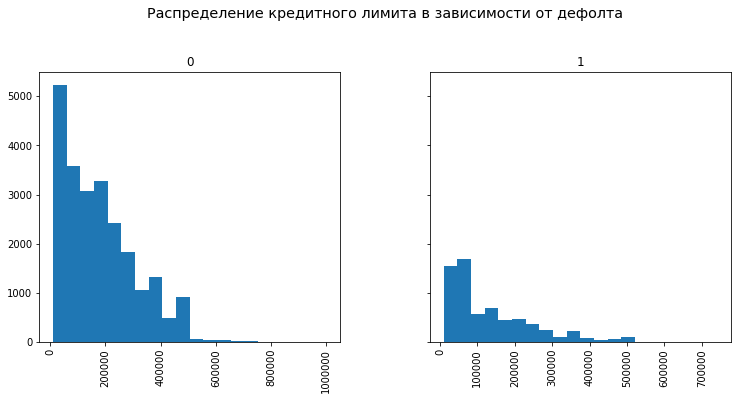

In [137]:
axes = df.hist(column='LIMIT_BAL', by='default', bins=20, sharey=True, figsize=(12,5))
plt.suptitle('Распределение кредитного лимита в зависимости от дефолта', size='x-large', y=1.08)

plt.show()


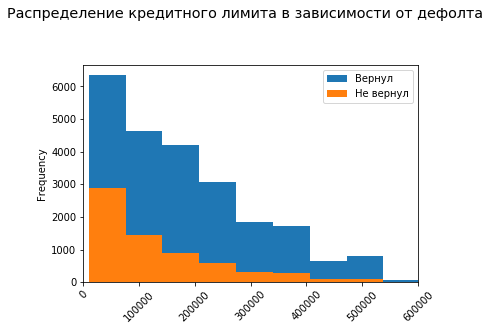

In [138]:
axes = df.pivot(columns='default', values='LIMIT_BAL').plot.hist(bins=15)
axes.legend(["Вернул", "Не вернул"])
axes.set_xlim(0, 600000)
plt.xticks(rotation=45)
plt.suptitle('Распределение кредитного лимита в зависимости от дефолта', size='x-large', y=1.08)

plt.show()

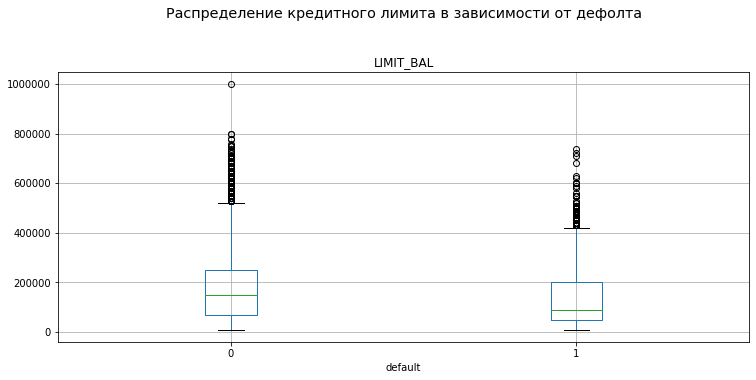

In [139]:
df.boxplot(column='LIMIT_BAL', by='default', figsize=(12,5))
plt.suptitle('Распределение кредитного лимита в зависимости от дефолта', size='x-large', y=1.08)
plt.show()

In [140]:
print('Медианное значение кредитного лимита для вернувших {: n}'.format(df.loc[df.default == 0, 'LIMIT_BAL'].median()))
print('Медианное значение кредитного лимита для не вернувших {: n}'.format(df.loc[df.default == 1, 'LIMIT_BAL'].median()))
print('Медианное значение кредитного лимита для ВСЕХ {: n}'.format(df['LIMIT_BAL'].median()))

Медианное значение кредитного лимита для вернувших  150000
Медианное значение кредитного лимита для не вернувших  90000
Медианное значение кредитного лимита для ВСЕХ  140000


In [141]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples


def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [142]:
no_default = list(map(np.median, get_bootstrap_samples(df.loc[df.default == 0, 'LIMIT_BAL'].values, 10000)))
yes_default = list(map(np.median, get_bootstrap_samples(df.loc[df.default == 1, 'LIMIT_BAL'].values, 10000)))

print("95% confidence interval for no default",  stat_intervals(no_default, 0.05))
print("95% confidence interval for default:",  stat_intervals(yes_default, 0.05))

95% confidence interval for no default [150000. 150000.]
95% confidence interval for default: [80000. 90000.]


In [143]:
delta_median_scores = list(map(lambda x: x[0] - x[1], zip(no_default, yes_default)))
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [60000. 70000.]


In [144]:
print('Уровень значимости для медианных значений кредитного лимита')
print('Критерий Стьюдента: ', stats.ttest_ind(no_default, yes_default, equal_var=False))
print('Критерий Манна-Уитни: ', stats.mannwhitneyu(no_default, yes_default))

Уровень значимости для медианных значений кредитного лимита
Критерий Стьюдента:  Ttest_indResult(statistic=2757.627926016208, pvalue=0.0)
Критерий Манна-Уитни:  MannwhitneyuResult(statistic=0.0, pvalue=0.0)


### Задание 2

#### Пол (SEX)
Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

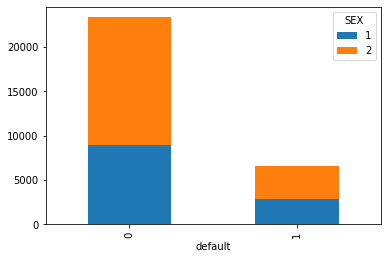

In [145]:
df.pivot_table(index='default', columns='SEX', values='LIMIT_BAL', aggfunc='count').plot(kind='bar', stacked=True)
plt.show()

Ничего толком не видно. Посчитаем в пропорции.

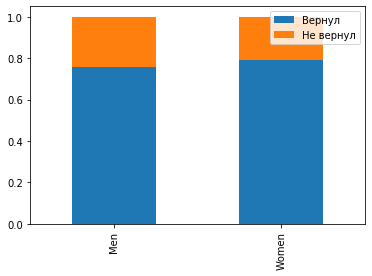

         Вернул  Не вернул
Men    0.758328   0.241672
Women  0.792237   0.207763


In [146]:
sex_dist = df.pivot_table(index='SEX', columns='default', values='LIMIT_BAL', aggfunc='count')
sex_dist = sex_dist.div(sex_dist.sum(1), axis=0)
sex_dist.index = pd.Index(['Men', 'Women'])
sex_dist.columns = ["Вернул", "Не вернул"]
sex_dist.plot(kind='bar', stacked=True)
plt.show()
print(sex_dist)

Ну теперь видно, что мужчины допускают неплатежи несколько чаще. Проверим значимость этих отличий.

In [147]:
print('Таблица сопряженности по X^2')
print(stats.chi2_contingency(df.pivot_table(index='SEX', columns='default', values='LIMIT_BAL', aggfunc='count').values)[3].
     astype(int))
print('Критерий значимости влияния Пола клиента на возврат кредита')
print(stats.chi2_contingency(df.pivot_table(index='SEX', columns='default', values='LIMIT_BAL', aggfunc='count').values)[1])


Таблица сопряженности по X^2
[[ 9258  2629]
 [14105  4006]]
Критерий значимости влияния Пола клиента на возврат кредита
4.944678999412044e-12


Так как p-value меньше 0.05 - пол оказывает значимое влияние на вероятность возврата кредита.

#### Образование (EDUCATION) 
Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

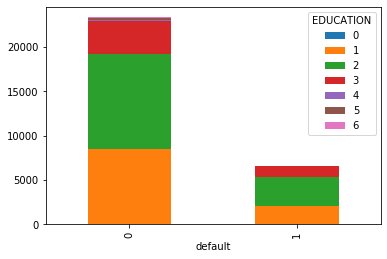

In [148]:
df.pivot_table(index='default', columns='EDUCATION', values='LIMIT_BAL', aggfunc='count').plot(kind='bar', stacked=True)

Дизбаланс в группах образования не позволяет оценить влияние Образования на вероятность возврата.

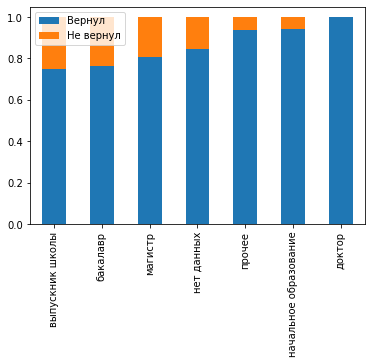

                         Вернул  Не вернул
выпускник школы        0.748424   0.251576
бакалавр               0.762651   0.237349
магистр                0.807652   0.192348
нет данных             0.843137   0.156863
прочее                 0.935714   0.064286
начальное образование  0.943089   0.056911
доктор                 1.000000   0.000000


In [149]:
# Построим таблицу сопряженности в процентах
ed_dist = df.pivot_table(index='EDUCATION', columns='default', values='LIMIT_BAL', aggfunc='count')
ed_dist = ed_dist.div(ed_dist.sum(axis=1), axis=0)

# Наведем немного красоты
ed_dist.index = pd.Index(['доктор', 'магистр', 'бакалавр', 'выпускник школы', 'начальное образование', 'прочее', 'нет данных'])
ed_dist.columns = ["Вернул", "Не вернул"]
ed_dist.fillna(0, inplace=True)
ed_dist.sort_values(by=['Вернул'], axis=0, inplace=True)
ed_dist.plot(kind='bar', stacked=True)
plt.show()
print(ed_dist)

In [150]:
ed_dist

,Вернул,Не вернул
выпускник школы,0.748424,0.251576
бакалавр,0.762651,0.237349
магистр,0.807652,0.192348
нет данных,0.843137,0.156863
прочее,0.935714,0.064286
начальное образование,0.943089,0.056911
доктор,1.000000,0.000000


In [151]:
ed_stat = df.groupby(['EDUCATION', 'default']).default.count().unstack().fillna(0)
ed_stat.index = pd.Index(['доктор', 'магистр', 'бакалавр', 'выпускник школы', 'начальное образование', 'прочее', 'нет данных'])
ed_stat.columns = ["Вернул", "Не вернул"]
ed_stat

,Вернул,Не вернул
доктор,14.0,0.0
магистр,8549.0,2036.0
бакалавр,10700.0,3330.0
выпускник школы,3680.0,1237.0
начальное образование,116.0,7.0
прочее,262.0,18.0
нет данных,43.0,8.0


In [152]:
print('Таблица сопряженности по X^2')
print(stats.chi2_contingency(ed_stat.values)[3].astype(int))
print('Критерий значимости влияния Пола клиента на возврат кредита')
print(stats.chi2_contingency(ed_stat.values)[1])

Таблица сопряженности по X^2
[[   10     3]
 [ 8243  2341]
 [10926  3103]
 [ 3829  1087]
 [   95    27]
 [  218    61]
 [   39    11]]
Критерий значимости влияния Пола клиента на возврат кредита
1.2332626245415605e-32


#### Ответы
Так как p-value меньше 0.05 - образование оказывает значимое влияние на вероятность возврата кредита.

Наилучшее значение Образования для возврата долга - образование "Доктор" (100% вероятность возврата); наихудшее - "Выпускник школы" (вероятность возврата 74.8%)

#### Семейное положение (MARRIAGE)
Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

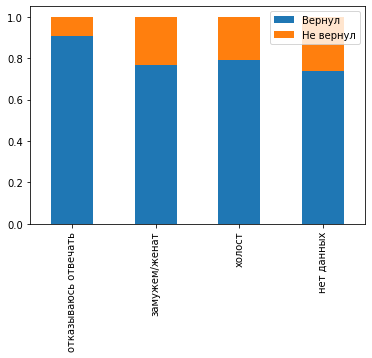

                        Вернул  Не вернул
отказываюсь отвечать  0.907407   0.092593
замужем/женат         0.765283   0.234717
холост                0.790717   0.209283
нет данных            0.739938   0.260062


In [153]:
mar_dist = df.pivot_table(index='MARRIAGE', columns='default', values='LIMIT_BAL', aggfunc='count')
mar_dist = mar_dist.div(mar_dist.sum(1), axis=0)
mar_dist.index = pd.Index(['отказываюсь отвечать', 'замужем/женат', 'холост', 'нет данных'])
mar_dist.columns = ["Вернул", "Не вернул"]
mar_dist.plot(kind='bar', stacked=True)
plt.show()
print(mar_dist)

In [154]:
mar_stat = df.groupby(['MARRIAGE', 'default']).default.count().unstack().fillna(0)
mar_stat.index = pd.Index(['отказываюсь отвечать', 'замужем/женат', 'холост', 'нет данных'])
mar_stat.columns = ["Вернул", "Не вернул"]
mar_stat.drop(['замужем/женат', 'холост'], inplace=True)

In [155]:
print('Таблица сопряженности по X^2')
print(stats.chi2_contingency(mar_stat.values)[3].astype(int))
print('\nКритерий значимости влияния семейного статуса клиента на возврат кредита')
print(stats.chi2_contingency(mar_stat.values)[1])

Таблица сопряженности по X^2
[[ 41  12]
 [246  76]]

Критерий значимости влияния семейного статуса клиента на возврат кредита
0.012099272223968525


In [174]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(df.drop('default', axis=1), 
                                                    df.default, 
                                                    stratify=df.default, 
                                                    test_size=0.3)


In [170]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [171]:
clf.score(X_test, y_test)

0.8084444444444444

In [178]:
cross_val_score(clf, X_train, y_train, cv=10)

array([0.81104236, 0.81151832, 0.79200381, 0.79390766, 0.80104712,
       0.80848023, 0.80990948, 0.81562649, 0.80419247, 0.80705098])

In [162]:
clf.feature_importances_

array([0.05986235, 0.01497721, 0.01792888, 0.01337732, 0.07201091,
       0.15697992, 0.03121328, 0.00750944, 0.00741476, 0.00413379,
       0.00868203, 0.06934194, 0.0501417 , 0.04496239, 0.04569302,
       0.03924619, 0.05116791, 0.04990931, 0.06298093, 0.04936425,
       0.0455652 , 0.0474928 , 0.05004446])

In [172]:
rfclf = RandomForestClassifier(n_estimators=500, max_depth=4, n_jobs=-1)
rfclf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [173]:
rfclf.score(X_test, y_test)

0.8143333333333334

In [179]:
cross_val_score(rfclf, X_train, y_train, cv=10)

array([0.81770585, 0.80723465, 0.80723465, 0.80675869, 0.80485483,
       0.80705098, 0.80943306, 0.81753216, 0.81562649, 0.81181515])

In [186]:
rfclf.feature_importances_

array([2.50863922e-02, 1.33847324e-04, 1.25444875e-03, 3.60289336e-04,
       1.71220381e-03, 3.42188278e-01, 1.83878935e-01, 1.06026294e-01,
       9.20061350e-02, 6.65080363e-02, 4.85901731e-02, 7.39086878e-03,
       6.35998308e-03, 4.84407370e-03, 4.50385092e-03, 4.14907543e-03,
       3.51214460e-03, 3.35272901e-02, 2.31009449e-02, 1.85941666e-02,
       1.09536291e-02, 7.90352094e-03, 7.41541850e-03])